# Modeling S&P 500 Forecasts
Train and evaluate models using engineered features.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load data with features
df = pd.read_csv("features.csv", parse_dates=["Date"], index_col="Date")

df.head()

,Open,High,Low,Close,Adj Close,return,ma7,ma21,volatility_7,target,target_up
Date,,,,,,,,,,,
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,0.012495,2029.924282,2028.764753,0.010758,2030.609985,1
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,0.012495,2029.924282,2028.764753,0.010758,2063.449951,1
2015-01-09,2044.810059,2064.429932,2038.329956,2063.449951,3364140000,0.016172,2029.924282,2028.764753,0.010758,2046.130005,0
2015-01-12,2028.260010,2049.300049,2022.579956,2046.130005,3456460000,-0.008394,2029.924282,2028.764753,0.010758,2031.579956,0
2015-01-13,2023.030029,2056.929932,2008.250000,2031.579956,4107300000,-0.007111,2029.924282,2028.764753,0.010758,2018.400024,0


In [21]:
y = df['target'] 
X = df.drop(columns=['target', 'target_up'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False # Keep chronological order
)

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 521.49
R² Score: 0.3599


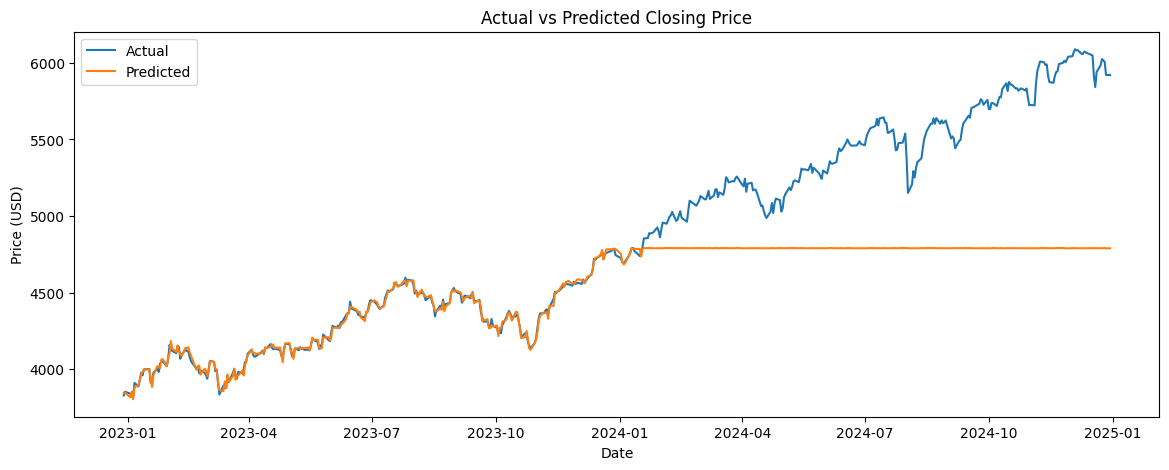

In [25]:
plt.figure(figsize=(14,5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.title("Actual vs Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()